In [1]:
import pickle
import sys

sys.path.append('..')
from src.sympy_utilities import *
from src.BinaryEncodings import *
from src.qiskit_utilities import *
from src.MatrixToPauliString import *

import matplotlib.pyplot as plt

def plot_data(eigs,offset=0):
    x=[[j+4+n*offset for n in range(len(eigs[j]))] for j in range(len(eigs))]
    y=[[d for d in eig] for eig in eigs]
    return (x,y)

def plot_data_by_level(eigs,offset=0,nskip=1):
    numLevels = len(eigs[len(eigs)-1])
    x=[[n+4+(j%2)*offset for n in range(0,len(eigs),nskip)] for j in range(numLevels)]
    y=[[eigs[n][i] if i<len(eigs[n]) else -1 for n in range(0,len(eigs),nskip)] for i in range(numLevels)]
    return (x,y)

In [2]:
import pickle

In [3]:
h_b_HO = 0.5*(p*p + m*m*q*q)
h_f_HO = -0.5*m#[bdag,b]
    
HOcuts = [n for n in range(2**2,2**5+1)]
HOhamEigs = []
#HOqubitEigs = []

#REMEMBER QUBIT EIGS HAVE EXTRA ZERO EIGENVALUES

#for n in HOcuts:
#    hamHO = Hamiltonian(h_b_HO, h_f_HO, {m:1, g:1},
#                  n, standard_encode)

    #eigSys = np.linalg.eig(getMatrix(hamHO.pauliStrings))
    #eigVals = [en.real for en in eigSys[0]]
    #HOqubitEigs.append(np.sort(eigVals))
#    eigSys = np.linalg.eig(np.array(hamHO.hamMatrix,dtype=float))
#    eigVals = [en.real for en in eigSys[0]]
#    HOhamEigs.append(np.sort(eigVals))
    
#    pickle.dump(HOhamEigs,open("DATA/ho_eigs_vs_cutoff.p","wb"))

In [4]:
HOcuts = [n for n in range(2**5,2**6+1,2)]
#for n in HOcuts:
#    hamHO = Hamiltonian(h_b_HO, h_f_HO, {m:1, g:1},
#                  n, standard_encode)

#    eigSys = np.linalg.eig(np.array(hamHO.hamMatrix,dtype=float))
#    eigVals = [en.real for en in eigSys[0]]
#    HOhamEigs.append(np.sort(eigVals))
    
#    pickle.dump(HOhamEigs,open("DATA/ho_eigs_vs_cutoff.p","wb"))

In [5]:
HOhamEigsLoad=pickle.load(open("DATA/ho_eigs_vs_cutoff.p","rb"))

In [6]:
import matplotlib 
#matplotlib.use("Agg")
plt.style.use("paper.mplstyle")

markersize=75

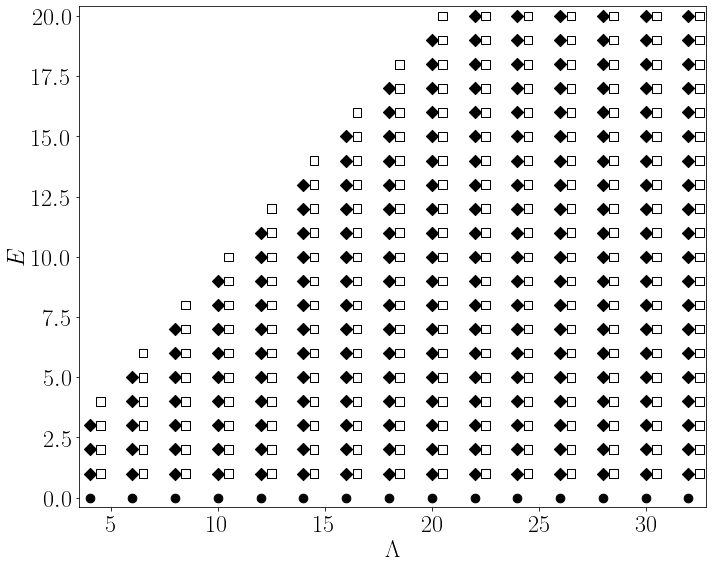

In [7]:

x, y = plot_data_by_level(HOhamEigsLoad, offset=0.5, nskip=2)
markers=['o', 's', 'P', 'X', 'D']

#for i in range(len(x)):
#    plt.scatter(x[i],y[i], marker=markers[i%len(markers)])

plt.scatter(x[0],y[0], color="black", marker='o', s=markersize)
for i in range(1, len(x)-1, 2):
    plt.scatter(x[i],y[i], color="black", marker='s', facecolors='none', s=markersize)
    plt.scatter(x[i+1],y[i+1], color="black", marker='D', s=markersize)


plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')

plt.xlim(3.5,32.8)
plt.ylim(-0.4,20.4)
plt.savefig('PLOTS/HO_spectra.pdf',bbox_inches='tight')

In [45]:
#AHOcuts = [n for n in range(2**2,2**5+1)]
#AHOqubitEigs = []
#AHOhamEigs = []

#h_b_AHO = 0.5*(p*p) + 0.5*(m*q+g*q**3)**2
#h_f_AHO = -0.5*(m+3*g*q*q)#[bdag,b]

#for n in AHOcuts:
#    ham = Hamiltonian(h_b_AHO, h_f_AHO, {m:1, g:1},
#                  n, standard_encode)

    #eigSys = np.linalg.eig(getMatrix(ham.pauliStrings))
    #eigVals = [en.real for en in eigSys[0]]
    #AHOqubitEigs.append(np.sort(eigVals))
#    eigSys = np.linalg.eig(np.array(ham.hamMatrix,dtype=float))
#    eigVals = [en.real for en in eigSys[0]]
#    AHOhamEigs.append(np.sort(eigVals))
    
#    pickle.dump(AHOhamEigs,open("DATA/aho_eigs_vs_cutoff.p","wb"))

In [46]:
#AHOcuts = [n for n in range(2**5,2**6+1)]

#for n in AHOcuts:
#    ham = Hamiltonian(h_b_AHO, h_f_AHO, {m:1, g:1},
#                  n, standard_encode)

#    eigSys = np.linalg.eig(np.array(ham.hamMatrix,dtype=float))
#    eigVals = [en.real for en in eigSys[0]]
#    AHOhamEigs.append(np.sort(eigVals))
    
#    pickle.dump(AHOhamEigs,open("DATA/aho_eigs_vs_cutoff.p","wb"))

In [47]:
AHOhamEigsLoad=pickle.load(open("DATA/aho_eigs_vs_cutoff.p","rb"))

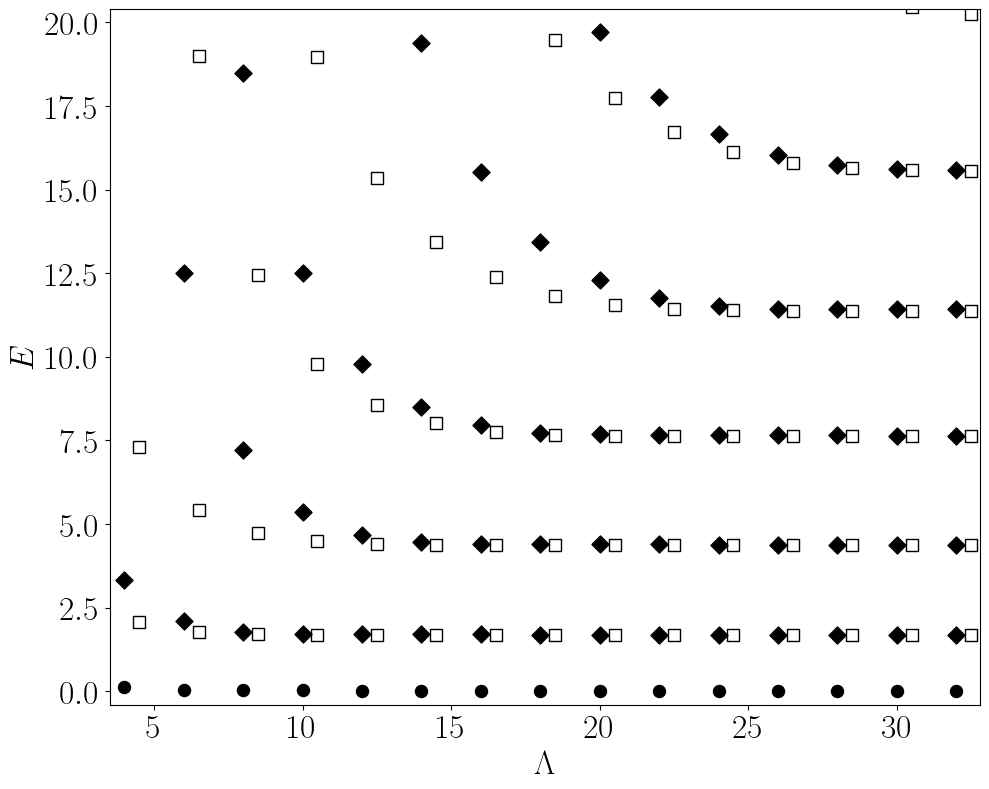

In [48]:
x, y = plot_data_by_level(AHOhamEigsLoad, offset=0.5, nskip=2)

#for i in range(len(x)):
#    plt.scatter(x[i],y[i], marker=markers[i%len(markers)])
plt.scatter(x[0],y[0], color="black", marker='o', s=markersize)
for i in range(1, len(x)-1, 2):
    plt.scatter(x[i],y[i], color="black", marker='s', facecolors='none', s=markersize)
    plt.scatter(x[i+1],y[i+1], color="black", marker='D', s=markersize)


plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')

plt.xlim(3.5,32.8)
plt.ylim(-0.4,20.4)
plt.savefig('PLOTS/AHO_spectra.pdf',bbox_inches='tight')

(-0.4, 20.4)

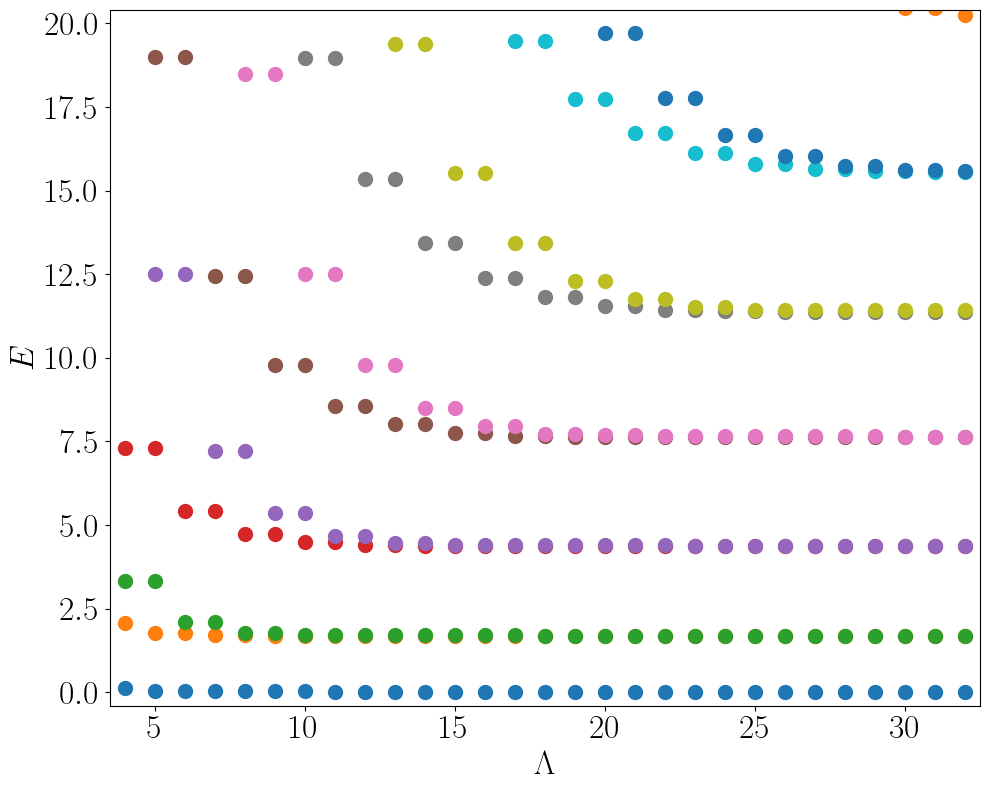

In [30]:
x, y = plot_data_by_level(AHOhamEigsLoad)

for i in range(len(x)):
    plt.scatter(x[i],y[i])


plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')

plt.xlim(3.5,32.5)
plt.ylim(-0.4,20.4)

#plt.savefig('PLOTS/AHO_spectra.pdf',bbox_inches='tight')

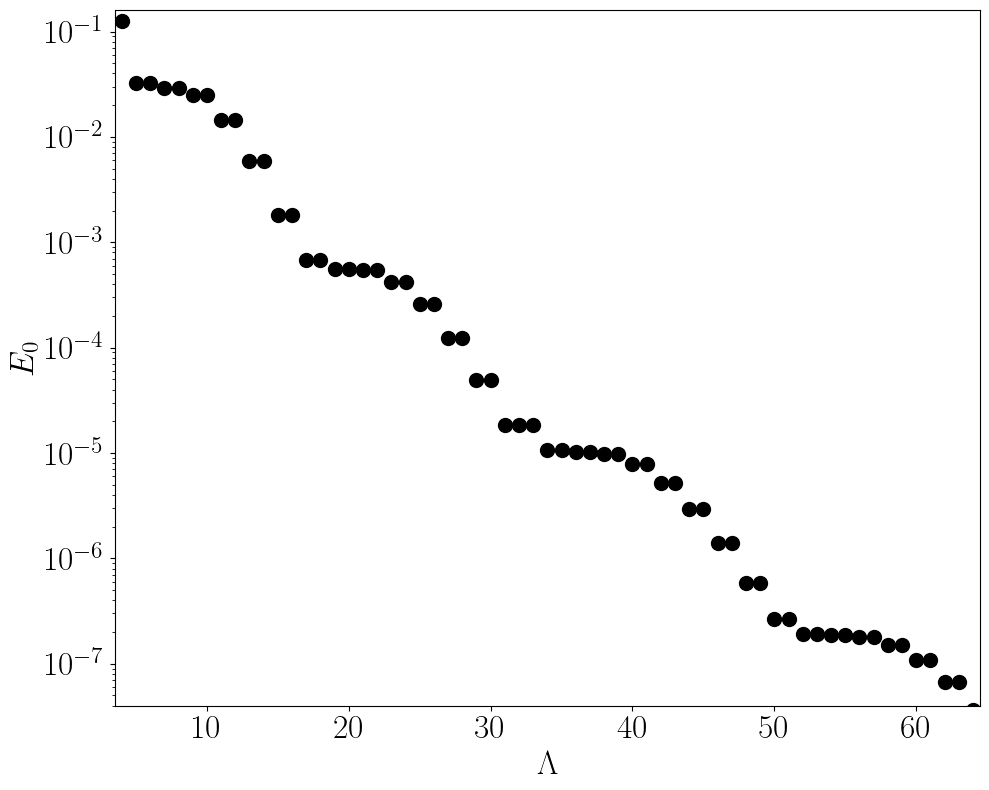

In [49]:
x, y = plot_data_by_level(AHOhamEigsLoad)

for i in range(len(x)):
    plt.scatter(x[i],y[i], c='black')


plt.xlabel('$\\Lambda$')
plt.ylabel('$E_0$')

plt.xlim(3.5,64.5)
plt.ylim(0.4*1e-7,1.6*1e-1)
plt.yscale('log')
plt.savefig('PLOTS/AHO_spectra_zoom.pdf',bbox_inches='tight')

/tmp/ipykernel_107745/1145054079.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('PLOTS/AHO_spectra_inset.pdf',bbox_inches='tight')


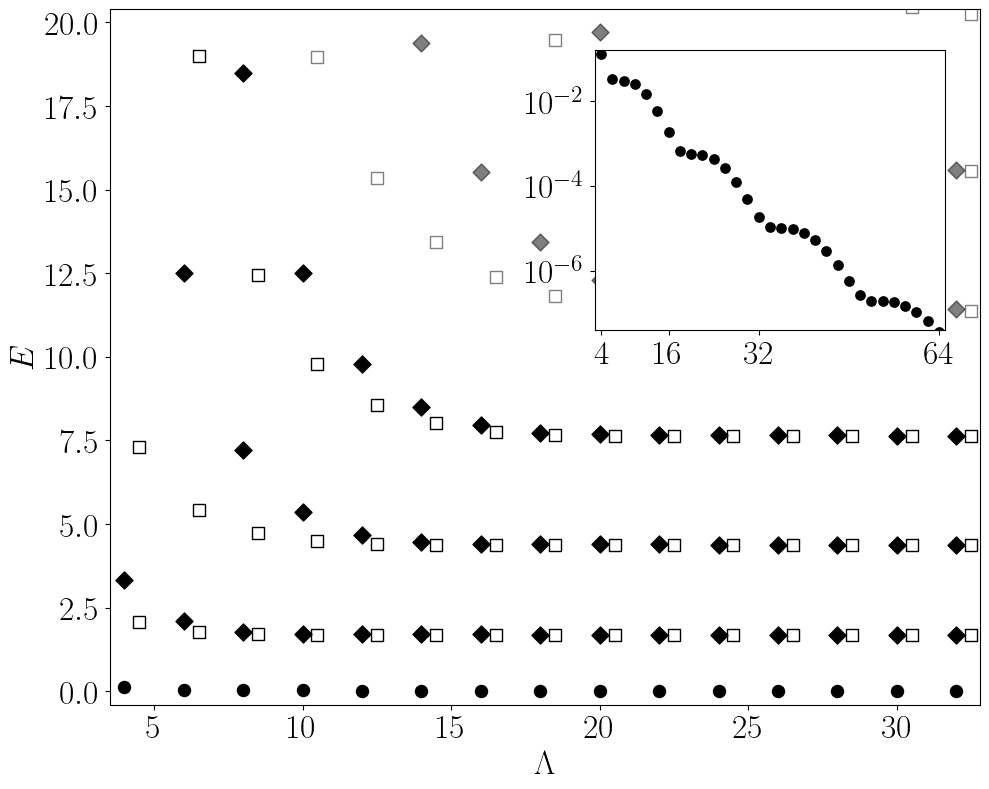

In [77]:
x, y = plot_data_by_level(AHOhamEigsLoad, offset=0.5, nskip=2)

fig, ax1 = plt.subplots()

left,bottom,width,height  = [0.6,0.58,0.35,0.35]

ax2 = fig.add_axes([left,bottom,width,height])

#for i in range(len(x)):
#    plt.scatter(x[i],y[i], marker=markers[i%len(markers)])
ax1.scatter(x[0],y[0], color="black", marker='o', s=markersize)
#for i in range(1, len(x)-1, 2):
for i in range(1,7,2):
    ax1.scatter(x[i],y[i], color="black", marker='s', facecolors='none', s=markersize)
    ax1.scatter(x[i+1],y[i+1], color="black", marker='D', s=markersize)

for i in range(7,len(x)-1,2):
    ax1.scatter(x[i],y[i], color="black", marker='s', facecolors='none', s=markersize, alpha=0.5)
    ax1.scatter(x[i+1],y[i+1], color="black", marker='D', s=markersize, alpha=0.5)

ax1.set_xlabel('$\\Lambda$')
ax1.set_ylabel('$E$')

ax1.set_xlim(3.5,32.8)
ax1.set_ylim(-0.4,20.4)


x, y = plot_data_by_level(AHOhamEigsLoad, nskip=2)
for i in range(1):
    ax2.scatter(x[i],y[i], color='black', s=markersize-30, marker='o')

ax2.set_xlim(2.9,65.1)
ax2.set_ylim(0.4*1e-7,1.6*1e-1)
ax2.set_xticks([4,16,32,64])
ax2.set_yscale('log')
#ax2.yaxis.set_minor_locator(matplotlib.ticker.LogLocator(numticks=999, subs="auto"))

fig.savefig('PLOTS/AHO_spectra_inset.pdf',bbox_inches='tight')

# Double well spectrum

In [33]:
h_b_DW = 0.5*(p*p + (m*q + g*(q*q + mu*mu))**2)
h_f_DW = -0.5*(m+2*g*q)#[bdag,b]

#DWcuts = [n for n in range(2**2,2**5+1)]
#DWqubitEigs = []
#DWhamEigs = []

#for n in DWcuts:
#    ham = Hamiltonian(h_b_DW, h_f_DW, {m:1, g:1, mu:1},
#                  n, standard_encode)

    #eigSys = np.linalg.eig(getMatrix(ham.pauliStrings))
    #eigVals = [en.real for en in eigSys[0]]
    #DWqubitEigs.append(np.sort(eigVals))
#    eigSys = np.linalg.eig(np.array(ham.hamMatrix,dtype=float))
#    eigVals = [en.real for en in eigSys[0]]
#    DWhamEigs.append(np.sort(eigVals))
    
#    pickle.dump(DWhamEigs,open("DATA/dw_eigs_vs_cutoff.p","wb"))

In [34]:
#DWcuts = [n for n in range(2**5,2**6+1)]


#for n in DWcuts:
#    ham = Hamiltonian(h_b_DW, h_f_DW, {m:1, g:1, mu:1},
#                  n, standard_encode)

#    eigSys = np.linalg.eig(np.array(ham.hamMatrix,dtype=float))
#    eigVals = [en.real for en in eigSys[0]]
#    DWhamEigs.append(np.sort(eigVals))
    
#    pickle.dump(DWhamEigs,open("DATA/dw_eigs_vs_cutoff.p","wb"))

In [35]:
DWhamEigsLoad=pickle.load(open("DATA/dw_eigs_vs_cutoff.p","rb"))

In [36]:
#x,y=plot_data(DWhamEigs)
#fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
#left, bottom, width, height = [0.2, 0.65, 0.2, 0.2]
#ax2 = fig.add_axes([left, bottom, width, height])

#for ax in [ax1,ax2]:
#    for i in range(len(DWhamEigs)):
#        ax.scatter(x[i],y[i])

#ax2.set_ylim([1e-1,1.1])
#ax2.set_xlabel('$\\Lambda$',fontsize=12)
#ax2.set_ylabel('$E$',fontsize=12)


#ax1.set_xlabel('$\\Lambda$')
#ax1.set_ylabel('$E$')

#fig.savefig('PLOTS/DW_spectra.pdf',bbox_inches='tight')

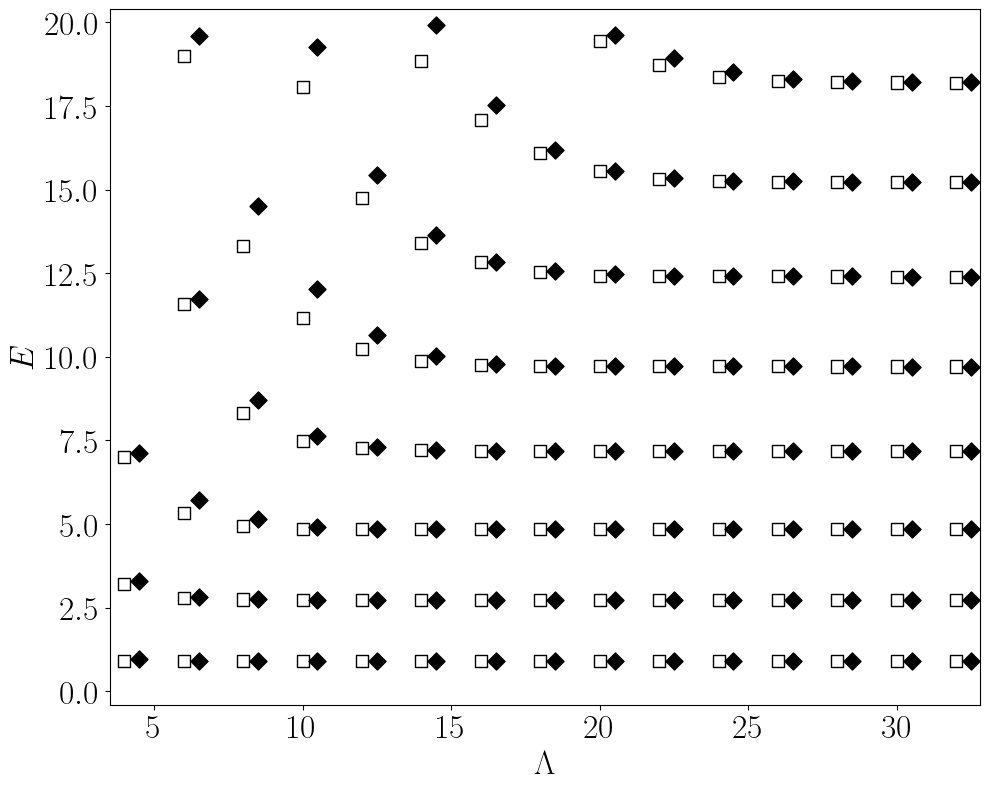

In [50]:
x, y = plot_data_by_level(DWhamEigsLoad, offset=0.5, nskip=2)

#plt.scatter(x[0],y[0], color="black", marker='o', s=markersize)
for i in range(0, len(x)-1, 2):
    plt.scatter(x[i],y[i], color="black", marker='s', facecolors='none', s=markersize)
    plt.scatter(x[i+1],y[i+1], color="black", marker='D', s=markersize)


plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')

plt.xlim(3.5,32.8)
plt.ylim(-0.4,20.4)
plt.savefig('PLOTS/DW_spectra.pdf',bbox_inches='tight')

#for i in range(len(x)):
#    plt.scatter(x[i],y[i])


#plt.xlabel('$\\Lambda$')
#plt.ylabel('$E$')

#plt.xlim(3.5,32.5)
#plt.ylim(-0.4,20.4)

#plt.savefig('PLOTS/DW_spectra.pdf',bbox_inches='tight')

# ground state is near or not to zero, and can see convergence of some excited states